In [3]:
from dtw import *
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import sounddevice as sd
from os.path import dirname, join as pjoin
from scipy.io import wavfile ; import scipy.io; import os
import glob      
import os
import argparse
import wave
from pydub import AudioSegment

## Convert m4a to wav

In [4]:
import os,sys
folder = "/Users/ninismacbook/other_docs/Y4S1/capstone/py_converted"
for filename in os.listdir(folder):
       infilename = os.path.join(folder,filename)
       if not os.path.isfile(infilename): continue
       oldbase = os.path.splitext(filename)
       newname = infilename.replace('.tmp', '.m4a')
       output = os.rename(infilename, newname)

# track.export of AudioSegment is the core function that converts the file
formats_to_convert = ['.m4a']

for (dirpath, dirnames, filenames) in os.walk(folder):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):

            filepath = dirpath + '/' + filename
            (path, file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.', '')
            try:
                track = AudioSegment.from_file(filepath,
                        file_extension_final)
                wav_filename = filename.replace(file_extension_final, 'wav')
                wav_path = dirpath + '/' + wav_filename
                print('CONVERTING: ' + str(filepath))
                file_handle = track.export(wav_path, format='wav')
                os.remove(filepath)
            except:
                print("ERROR CONVERTING " + str(filepath))

CONVERTING: /Users/ninismacbook/other_docs/Y4S1/capstone/py_converted/test3.m4a


## Downsampling

In [5]:
file_path = "/Users/ninismacbook/other_docs/Y4S1/capstone/downsampled"

import glob
import os
directory='./'
os.chdir(directory)
files=glob.glob('*.wav')
for filename in files:
    os.unlink(filename)
    
# os.chdir("..")
# print(os.getcwd())    

In [6]:
# Source: https://stackoverflow.com/questions/30619740/downsampling-wav-audio-file

os.chdir("/Users/ninismacbook/other_docs/Y4S1/capstone/py_converted")
set_framerate = 8000

for filepath in glob.glob("./*.wav"):
    sound = AudioSegment.from_file(filepath, format='wav', frame_rate=44100)
    sound = sound.set_frame_rate(set_framerate)
    sound.export("/Users/ninismacbook/other_docs/Y4S1/capstone/downsampled/"+ filepath, format='wav') 

### (Example from https://dynamictimewarping.github.io/python/)

### Audio processing in python

In [2]:
# online converted

# wav_fname = "./01-online-convert.wav"

# samplerate, data = wavfile.read(wav_fname)
# print(f"number of channels = {data.shape[1]}")

In [3]:
# length = data.shape[0] / samplerate
# print(f"length = {length}s")
# time = np.linspace(0., length, data.shape[0])
# plt.plot(time, data[:, 0], label="Left channel")
# plt.plot(time, data[:, 1], label="Right channel")
# plt.legend()
# plt.xlabel("Time [s]")
# plt.ylabel("Amplitude")
# plt.show()

In [7]:
wav_fname = "/Users/ninismacbook/other docs/Y4S1/capstone/py_converted/01.wav"

samplerate, data = wavfile.read(wav_fname)
# print(data)
# print(len(data))

# plt.plot(time, data, label="Left channel");

In [8]:
# f1 = '01-online-convert.wav'
# f2 = './py_converted/01.wav'

# samplerate, data1 = wavfile.read(f1)
# samplerate, data2 = wavfile.read(f2)
# f1 == f2

## Use script converted files to test out dtw

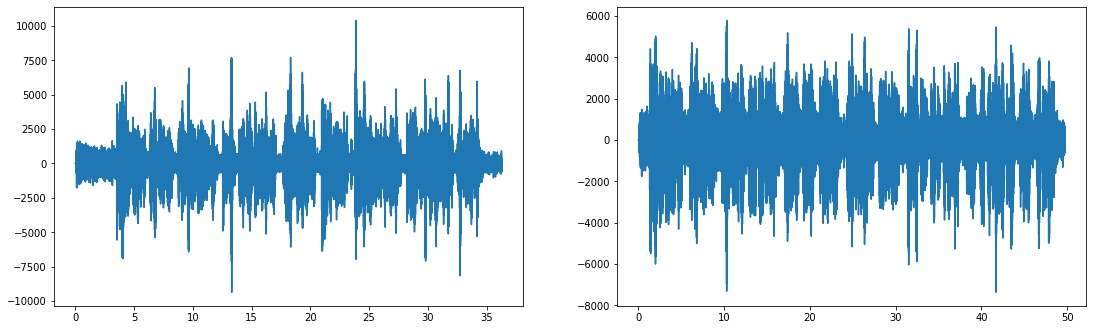

In [9]:
# Use 01 and 03.wav to test dtw

file1 = "/Users/ninismacbook/other docs/Y4S1/capstone/py_converted/01.wav"
file2 = "/Users/ninismacbook/other docs/Y4S1/capstone/py_converted/03.wav"

samplerate, query = wavfile.read(file1)
samplerate, ref = wavfile.read(file2)

length1 = query.shape[0] / samplerate
time1 = np.linspace(0., length1, query.shape[0])

length2 = ref.shape[0] / samplerate
time2 = np.linspace(0., length2, ref.shape[0])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 5.5)
# fig.suptitle('Recording 1 and 3')

ax1.plot(time1, query)

ax2.plot(time2, ref);

## Bamboo vs Pampoo

In [10]:
# Set audio portion for file 1 and 2

print('Sample rate=', samplerate)
# At around second 3-3.5 of 01.wav I said bamboo wall. 
# At around second 1-1.5 of 03.wav I said "pampoo" wall

seg1_1 = 3
seg1_2 = 3.5

seg2_1 = 1
seg2_2 = 1.5

query_sample = query[int(samplerate*seg1_1): int(samplerate*seg1_2)]
ref_sample = ref[int(samplerate*seg2_1): int(samplerate*seg2_2)]

query_timestamp = time1[int(samplerate*seg1_1): int(samplerate*seg1_2)]
ref_timestamp = time2[int(samplerate*seg2_1): int(samplerate*seg2_2)]

print('Query sample length', len(query_sample))
print('Ref sample length', len(ref_sample))

Sample rate= 44100
Query sample length 22050
Ref sample length 22050


In [11]:
# First file
sd.play(query_sample, samplerate = samplerate, blocksize=18000)

In [12]:
# Second file 
sd.play(ref_sample, samplerate = samplerate, blocksize=18000)

In [13]:
alignment = dtw(query_sample, ref_sample, keep_internals=False)

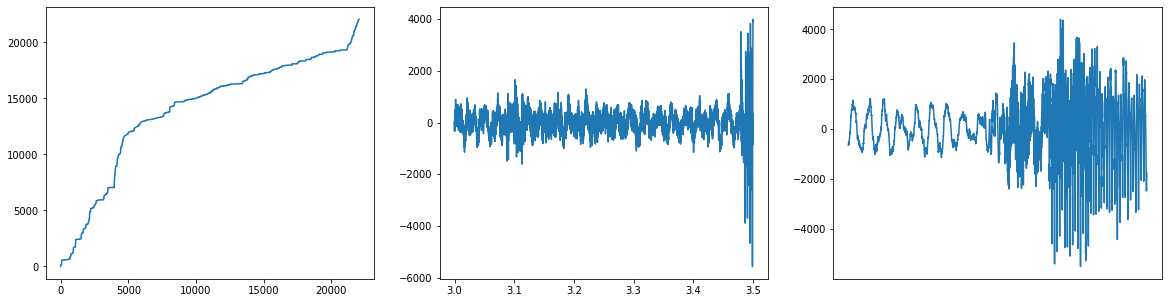

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20, 5)

# S = second 
S = np.arange(0, 2, 1)
x_ticks = [x * samplerate for x in S]
plt.xticks(x_ticks, S);
ax1.plot(alignment.index1, alignment.index2);
ax2.plot(query_timestamp, query_sample)
ax3.plot(ref_timestamp, ref_sample);

# alignment.plot(type="threeway");

## They are strong vs. They are strong

In [13]:
# Set audio portion for file 1 and 2

# print('Sample rate=', samplerate)

# segment1 = samplerate * np.array[3:5]
seg1_1 = 6
seg1_2 = 7

seg2_1 = 6
seg2_2 = 7

query_sample = query[int(samplerate*seg1_1): int(samplerate*seg1_2)]
ref_sample = ref[int(samplerate*seg2_1): int(samplerate*seg2_2)]

query_timestamp = time1[int(samplerate*seg1_1): int(samplerate*seg1_2)]
ref_timestamp = time2[int(samplerate*seg2_1): int(samplerate*seg2_2)]

print('Query sample length', len(query_sample))
print('Ref sample length', len(ref_sample))

Query sample length 44100
Ref sample length 44100


In [14]:
sd.play(query_sample, samplerate = samplerate, blocksize=18000)

In [15]:
sd.play(ref_sample, samplerate = samplerate, blocksize=18000)

In [21]:
alignment = dtw(query_sample, ref_sample, keep_internals=True)

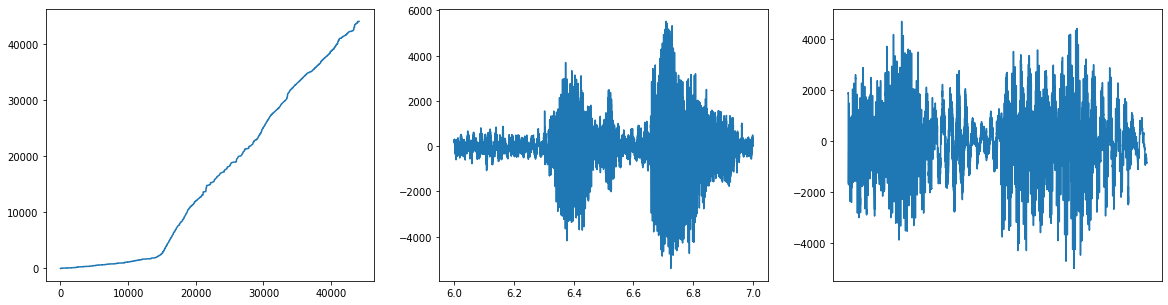

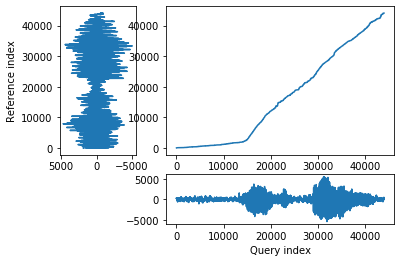

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20, 5)

# S = second 
S = np.arange(0, 2, 1)
x_ticks = [x * samplerate for x in S]
plt.xticks(x_ticks, S);
ax1.plot(alignment.index1, alignment.index2);
ax2.plot(query_timestamp, query_sample)
ax3.plot(ref_timestamp, ref_sample);

alignment.plot(type="threeway");

## Compare "Bamboo walls are getting to be very popular"

In [20]:
file1 = "/Users/ninismacbook/other docs/Y4S1/capstone/downsampled/01.wav"
file2 = "/Users/ninismacbook/other docs/Y4S1/capstone/downsampled/03.wav"

samplerate, query = wavfile.read(file1)
print('sample rate =',samplerate)
samplerate, ref = wavfile.read(file2)

length1 = query.shape[0] / samplerate
time1 = np.linspace(0., length1, query.shape[0])

length2 = ref.shape[0] / samplerate
time2 = np.linspace(0., length2, ref.shape[0])

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.set_size_inches(18.5, 5.5)
# fig.suptitle('Recording 1 and 3')


sample rate = 8000


In [21]:
seg1_1 = 3
seg1_2 = 6

seg2_1 = 1
seg2_2 = 6

query_sample = query[int(samplerate*seg1_1): int(samplerate*seg1_2)]
ref_sample = ref[int(samplerate*seg2_1): int(samplerate*seg2_2)]

query_timestamp = time1[int(samplerate*seg1_1): int(samplerate*seg1_2)]
ref_timestamp = time2[int(samplerate*seg2_1): int(samplerate*seg2_2)]

print('Query sample length', len(query_sample))
print('Ref sample length', len(ref_sample))

Query sample length 24000
Ref sample length 40000


In [33]:
sd.play(query_sample, samplerate = samplerate, blocksize=18000)

8000


In [37]:
sd.play(ref_sample, samplerate = samplerate, blocksize=18000)

In [32]:
alignment1 = dtw(query_sample, ref_sample, keep_internals=True)

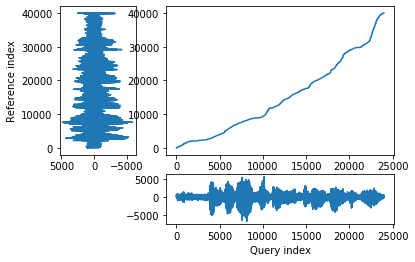

In [35]:
alignment1.plot(type="threeway");

## Compare normal vs nasal

In [31]:
# Nasal voice recording 
file2 = "/Users/ninismacbook/other docs/Y4S1/capstone/downsampled/04.wav"
samplerate, ref = wavfile.read(file2)

length2 = ref.shape[0] / samplerate
time2 = np.linspace(0., length2, ref.shape[0])

seg2_1 = 1
seg2_2 = 6

ref_sample = ref[int(samplerate*seg2_1): int(samplerate*seg2_2)]

ref_timestamp = time2[int(samplerate*seg2_1): int(samplerate*seg2_2)]

In [33]:
sd.play(ref_sample, 8000)

In [66]:
alignment = dtw(query_sample, ref_sample, keep_internals=True)

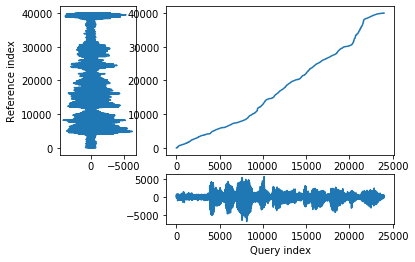

In [41]:
alignment.plot(type="threeway");

## Compare normal vs more pauses

In [36]:
file1 = "/Users/ninismacbook/other docs/Y4S1/capstone/downsampled/01.wav"

samplerate, query = wavfile.read(file1)

length1 = query.shape[0] / samplerate
time1 = np.linspace(0., length1, query.shape[0])

seg1_1 = 1
seg1_2 = 6

query_sample = query[int(samplerate*seg1_1): int(samplerate*seg1_2)]

query_timestamp = time1[int(samplerate*seg1_1): int(samplerate*seg1_2)]

print('Query sample length', len(query_sample))

# More pauses recording
file2 = "/Users/ninismacbook/other docs/Y4S1/capstone/downsampled/05.wav"
samplerate, ref = wavfile.read(file2)

length2 = ref.shape[0] / samplerate
time2 = np.linspace(0., length2, ref.shape[0])

seg2_1 = 1
seg2_2 = 6

ref_sample = ref[int(samplerate*seg2_1): int(samplerate*seg2_2)]
ref_timestamp = time2[int(samplerate*seg2_1): int(samplerate*seg2_2)]

print('Ref sample length', len(ref_sample))


Query sample length 40000
Ref sample length 40000


In [38]:
sd.play(ref_sample, samplerate = samplerate, blocksize=18000)

In [81]:
alignment = dtw(query_sample, ref_sample, keep_internals=True)

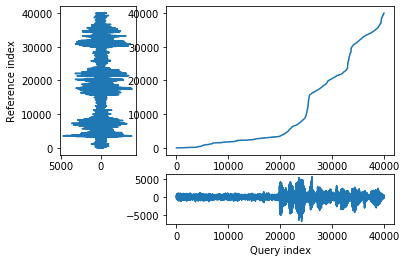

In [82]:
alignment.plot(type="threeway");